<a href="https://colab.research.google.com/github/sossyh/ImgClssification-CNN/blob/main/Pneumonia_Detection_From_using_x_ray_Imgs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [69]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

chest-xray-pneumonia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [70]:
import zipfile
zip_ref = zipfile.ZipFile('/content/chest-xray-pneumonia.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [71]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [72]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/chest_xray/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

val_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/chest_xray/val',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


In [73]:
def Normalize(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(Normalize)
val_ds = val_ds.map(Normalize)

In [74]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [75]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_6 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_7 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [76]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
trained = model.fit(train_ds,epochs=10,validation_data=val_ds)

Epoch 1/10
163/163 [==============================] - 34s 190ms/step - loss: 0.8416 - accuracy: 0.9062 - val_loss: 72.4838 - val_accuracy: 0.5000
Epoch 2/10
163/163 [==============================] - 32s 186ms/step - loss: 0.1516 - accuracy: 0.9563 - val_loss: 44.8973 - val_accuracy: 0.5000
Epoch 3/10
163/163 [==============================] - 33s 193ms/step - loss: 0.1261 - accuracy: 0.9571 - val_loss: 14.7703 - val_accuracy: 0.5000
Epoch 4/10
163/163 [==============================] - 32s 187ms/step - loss: 0.0934 - accuracy: 0.9686 - val_loss: 0.9768 - val_accuracy: 0.6250
Epoch 5/10
163/163 [==============================] - 32s 188ms/step - loss: 0.1105 - accuracy: 0.9645 - val_loss: 1.2944 - val_accuracy: 0.7500
Epoch 6/10
163/163 [==============================] - 32s 189ms/step - loss: 0.0989 - accuracy: 0.9678 - val_loss: 26.4474 - val_accuracy: 0.6250
Epoch 7/10
163/163 [==============================] - 32s 188ms/step - loss: 0.1158 - accuracy: 0.9643 - val_loss: 3.4145 - va

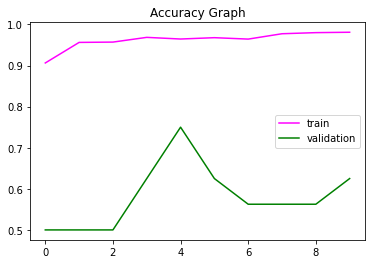

In [77]:
plt.plot(trained.history['accuracy'],color='magenta',label='train')
plt.plot(trained.history['val_accuracy'],color='green',label='validation')
plt.title('Accuracy Graph')
plt.legend()
plt.show()

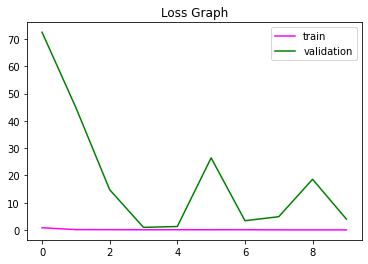

In [78]:
plt.plot(trained.history['loss'],color='magenta',label='train')
plt.plot(trained.history['val_loss'],color='green',label='validation')
plt.title('Loss Graph')
plt.legend()
plt.show()

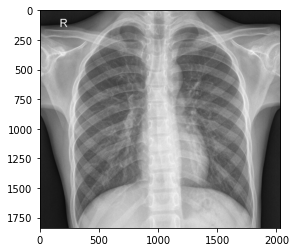

In [104]:

test_img = cv2.imread('/content/chest_xray/test/NORMAL/IM-0005-0001.jpeg')
plt.imshow(test_img)

In [105]:
test_img.shape
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
model.predict(test_input)
if model.predict(test_input)[0][0]== 1:
  print("Pnemonic")
elif model.predict(test_input)[0][0]== 0:
  print("Normal")

1/1 [==============================] - 0s 16ms/step
Normal
